In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy

In [2]:
from sklearn import metrics, model_selection, preprocessing, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0


In [4]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
gbc = GradientBoostingClassifier()

In [8]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [9]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state=144)
gbc.fit(X_train,Y_train)

R2_train = np.round(gbc.score(X_train,Y_train),3)
R2_test  = np.round(gbc.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :0.979
Testing  score is :0.626


In [11]:
loss      = ['deviance','exponential']
learning_rate =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
min_samples_split = np.arange(2,20,5)
min_samples_leaf  = np.arange(1,20,5)
min_weight_fraction_leaf = [0.1, 0.3,0.5,0.7,0.9]
min_impurity_decrease  = [0.3,0.5,0.7]
max_depth      = np.arange(1,20, 5)
max_features = list(['auto','sqrt'])
ccp_alpha  = [1,10,100]

n_estimators  = 100
n_jobs = -1
random_state = 144

In [12]:
gbc_grid = GradientBoostingClassifier(verbose=1)
gbc_grid.set_params(random_state = 144, n_estimators = 100)

param_grid = {'min_weight_fraction_leaf':min_weight_fraction_leaf, 'max_depth':max_depth, 'max_features':max_features}

gbc_grid = GridSearchCV(gbc_grid, param_grid, cv = 3, return_train_score=True)

%time gbc_grid.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1856            0.40s
         2           1.1467            0.40s
         3           1.1155            0.36s
         4           1.0890            0.36s
         5           1.0671            0.38s
         6           1.0470            0.38s
         7           1.0297            0.36s
         8           1.0135            0.36s
         9           1.0002            0.36s
        10           0.9873            0.36s
        20           0.8923            0.30s
        30           0.8339            0.27s
        40           0.7940            0.23s
        50           0.7632            0.18s
        60           0.7401            0.14s
        70           0.7208            0.11s
        80           0.7044            0.07s
        90           0.6904            0.03s
       100           0.6777            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1879            0.30s
        

        40           0.8096            0.16s
        50           0.7783            0.13s
        60           0.7545            0.10s
        70           0.7344            0.08s
        80           0.7169            0.05s
        90           0.7035            0.02s
       100           0.6906            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1969            0.30s
         2           1.1776            0.30s
         3           1.1587            0.29s
         4           1.1376            0.26s
         5           1.1157            0.27s
         6           1.1017            0.27s
         7           1.0787            0.27s
         8           1.0608            0.26s
         9           1.0406            0.25s
        10           1.0278            0.27s
        20           0.9213            0.22s
        30           0.8598            0.19s
        40           0.8195            0.16s
        50           0.7905            0.13s
        6

        40           0.4219            0.30s
        50           0.3605            0.24s
        60           0.3092            0.19s
        70           0.2664            0.14s
        80           0.2320            0.09s
        90           0.2020            0.05s
       100           0.1782            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1550            0.49s
         2           1.0919            0.49s
         3           1.0353            0.45s
         4           0.9942            0.45s
         5           0.9527            0.45s
         6           0.9200            0.46s
         7           0.8913            0.45s
         8           0.8657            0.45s
         9           0.8417            0.44s
        10           0.8179            0.44s
        20           0.6341            0.38s
        30           0.5188            0.33s
        40           0.4382            0.28s
        50           0.3738            0.24s
        6

        40           0.5198            0.27s
        50           0.4640            0.22s
        60           0.4136            0.18s
        70           0.3746            0.13s
        80           0.3378            0.09s
        90           0.3086            0.04s
       100           0.2812            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1700            0.30s
         2           1.1270            0.34s
         3           1.0775            0.32s
         4           1.0364            0.34s
         5           1.0001            0.34s
         6           0.9698            0.34s
         7           0.9412            0.35s
         8           0.9150            0.34s
         9           0.8883            0.33s
        10           0.8666            0.33s
        20           0.7056            0.29s
        30           0.6066            0.25s
        40           0.5343            0.21s
        50           0.4766            0.18s
        6

        50           0.3615            0.27s
        60           0.3077            0.22s
        70           0.2652            0.16s
        80           0.2309            0.11s
        90           0.2009            0.06s
       100           0.1762            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1550            0.49s
         2           1.0919            0.59s
         3           1.0353            0.58s
         4           0.9942            0.58s
         5           0.9527            0.55s
         6           0.9200            0.52s
         7           0.8913            0.49s
         8           0.8657            0.48s
         9           0.8417            0.48s
        10           0.8179            0.47s
        20           0.6341            0.39s
        30           0.5183            0.36s
        40           0.4368            0.30s
        50           0.3709            0.26s
        60           0.3156            0.21s
        7

        30           0.5977            0.28s
        40           0.5196            0.23s
        50           0.4635            0.19s
        60           0.4140            0.16s
        70           0.3735            0.12s
        80           0.3385            0.08s
        90           0.3084            0.04s
       100           0.2799            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1700            0.50s
         2           1.1270            0.49s
         3           1.0775            0.55s
         4           1.0364            0.55s
         5           1.0001            0.59s
         6           0.9698            0.56s
         7           0.9412            0.56s
         8           0.9150            0.53s
         9           0.8883            0.51s
        10           0.8666            0.49s
        20           0.7055            0.39s
        30           0.6066            0.37s
        40           0.5343            0.29s
        5

        30           0.5079            0.39s
        40           0.4259            0.33s
        50           0.3615            0.28s
        60           0.3077            0.23s
        70           0.2652            0.17s
        80           0.2309            0.11s
        90           0.2009            0.06s
       100           0.1762            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1550            0.55s
         2           1.0919            0.49s
         3           1.0353            0.52s
         4           0.9942            0.50s
         5           0.9527            0.49s
         6           0.9200            0.49s
         7           0.8913            0.48s
         8           0.8657            0.47s
         9           0.8417            0.47s
        10           0.8179            0.47s
        20           0.6341            0.44s
        30           0.5183            0.39s
        40           0.4368            0.34s
        5

        20           0.7030            0.28s
        30           0.5977            0.24s
        40           0.5196            0.20s
        50           0.4635            0.17s
        60           0.4140            0.14s
        70           0.3735            0.10s
        80           0.3385            0.07s
        90           0.3084            0.03s
       100           0.2799            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1700            0.49s
         2           1.1270            0.44s
         3           1.0775            0.45s
         4           1.0364            0.46s
         5           1.0001            0.46s
         6           0.9698            0.47s
         7           0.9412            0.48s
         8           0.9150            0.47s
         9           0.8883            0.44s
        10           0.8666            0.42s
        20           0.7055            0.31s
        30           0.6066            0.28s
        4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\ProgramData\Anaconda3\lib\site

        30           0.9108            0.34s
        40           0.8809            0.29s
        50           0.8602            0.23s
        60           0.8431            0.17s
        70           0.8300            0.12s
        80           0.8216            0.08s
        90           0.8141            0.04s
       100           0.8075            0.00s
CPU times: total: 25.2 s
Wall time: 25.3 s


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(random_state=144, verbose=1),
             param_grid={'max_depth': array([ 1,  6, 11, 16]),
                         'max_features': ['auto', 'sqrt'],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5, 0.7, 0.9]},
             return_train_score=True)

In [14]:
gbc_df = pd.DataFrame(gbc_grid.cv_results_)
gbc_df.shape

(40, 19)

In [15]:
gbc_df.dropna(axis = 0, how = 'any', inplace=True)
gbc_df.shape

(24, 19)

In [16]:
gbc_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features',
       'param_min_weight_fraction_leaf', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [17]:
gbc_final_df = gbc_df.loc[:,['param_max_depth','param_max_features','param_min_weight_fraction_leaf',
                            'mean_train_score','mean_test_score']]

In [18]:
gbc_final_df['diff'] = gbc_final_df['mean_train_score']-gbc_final_df['mean_test_score']

In [19]:
gbc_final_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    0.989629
mean_test_score     0.655590
dtype: float64

In [20]:
print('Training score is :' + str(np.round(gbc_grid.best_estimator_.score(X_train, Y_train),2)))
print('Testing  score is :' + str(np.round(gbc_grid.best_estimator_.score(X_test, Y_test),2)))

Training score is :0.69
Testing  score is :0.65


In [21]:
Y_0 = Y_train==0
Y_1 = Y_train==1
Y_2 = Y_train==2
Y_3 = Y_train==3
Y_4 = Y_train==4

In [22]:
prob_train = gbc_grid.best_estimator_.predict_proba(X_train)
prob_test  = gbc_grid.best_estimator_.predict_proba(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [25]:
conf_data_train = confusion_matrix(Y_train,gbc_grid.best_estimator_.predict(X_train))
conf_data_test  = confusion_matrix(Y_test,gbc_grid.best_estimator_.predict(X_test))

In [26]:
conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)

****************************************************************************************************


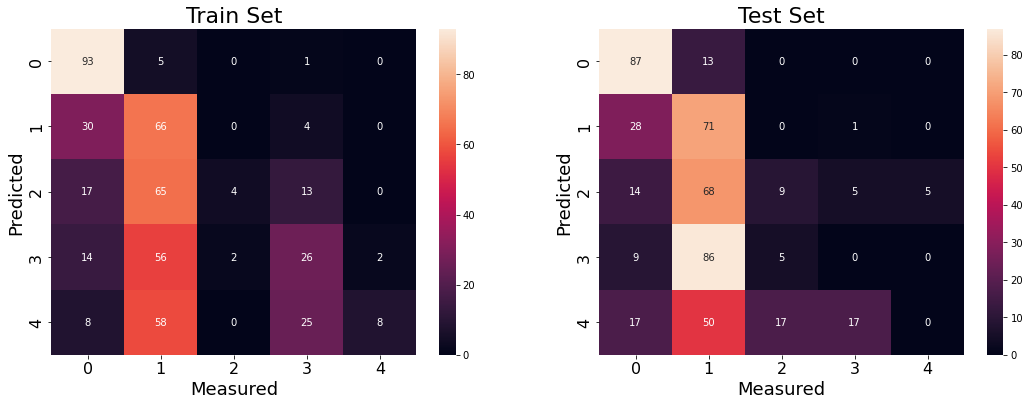

In [27]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);